In [ ]:
#!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd "/content/gdrive/My Drive/practice - fastai/Lesson 1"
loc = !pwd

/content/gdrive/My Drive/practice - fastai/Lesson 1


In [ ]:
#always write this before you start your file
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#for practice we will be importing all the libraries
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
#the batch size of images that will be trained in one instance
bs = 64
path = '/content/gdrive/My Drive/practice - fastai/Lesson 1/chest_xray'

#**Looking at the data!**

I got the data by using Kaggle API. 

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="tain", valid = 'val', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

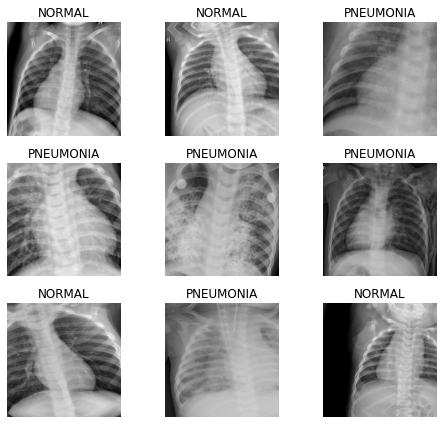

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['NORMAL', 'PNEUMONIA']


(2, 2)

#**Resnet34 Model**

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.513879,0.279714,0.081127,16:41
1,0.310840,0.286698,0.091375,04:23
2,0.237357,0.220962,0.077711,04:10
3,0.196956,0.194493,0.068318,04:14


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

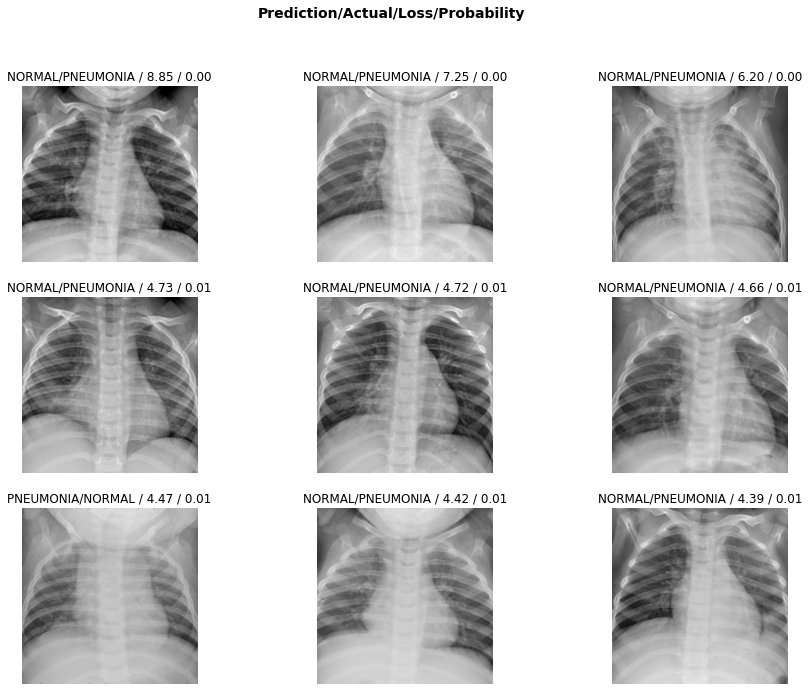

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

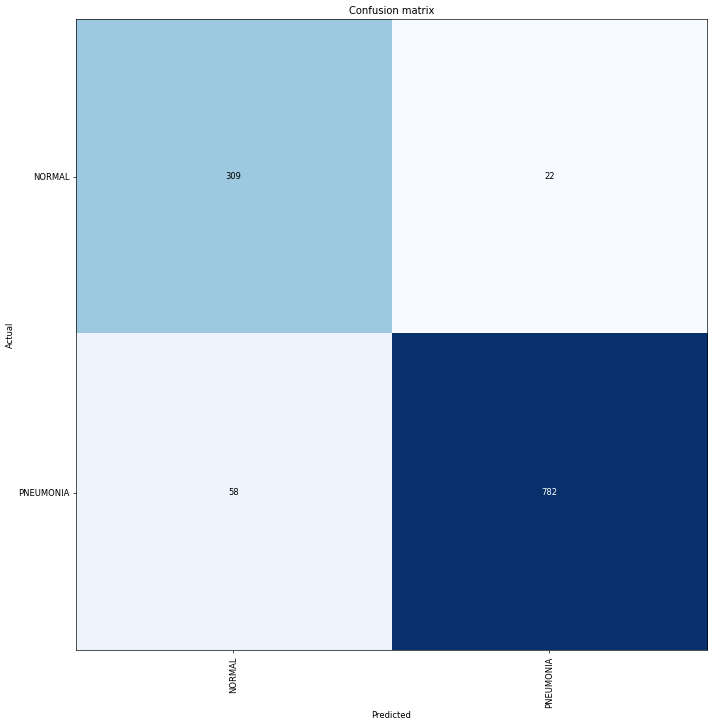

In [ ]:
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [ ]:
interp.most_confused(min_val = 2)

[('PNEUMONIA', 'NORMAL', 58), ('NORMAL', 'PNEUMONIA', 22)]

##Unfreezing, fine-tuning, and learning rate

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.167696,0.110899,0.038429,04:14


In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


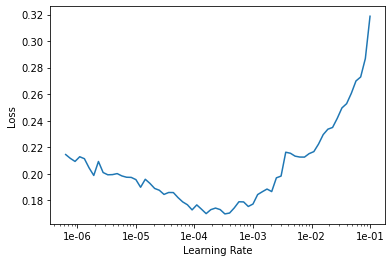

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.167907,0.195606,0.065756,04:19
1,0.154659,0.169868,0.057216,04:18


The model has an accuracy of almost 95%!

#**Resnet50 Model**

In [ ]:
learner_50 = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learner_50.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learner_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.497984,0.408691,0.089667,04:22
1,0.281422,0.244278,0.070880,04:22
2,0.192169,0.167791,0.053800,04:24
3,0.147083,0.157326,0.049530,04:32


In [ ]:
learner_50.save('stage_50-1')

In [ ]:
interp_50 = ClassificationInterpretation.from_learner(learner_50)
losses,idxs = interp.top_losses()
len(data.valid_ds) == len(idxs) == len(losses)

True

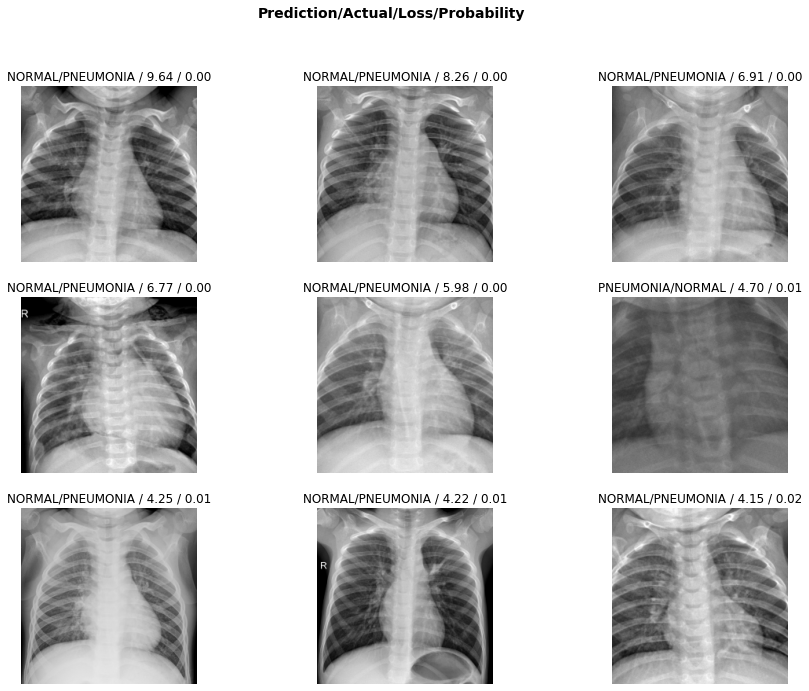

In [ ]:
interp_50.plot_top_losses(9, figsize=(15,11))

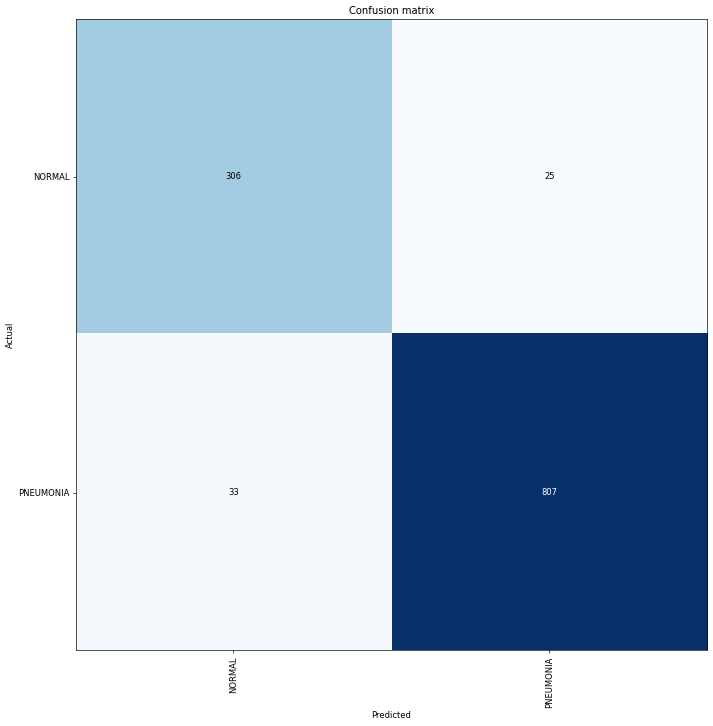

In [ ]:
interp_50.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [ ]:
interp_50.most_confused(min_val = 2)

[('PNEUMONIA', 'NORMAL', 33), ('NORMAL', 'PNEUMONIA', 25)]

## Unfreezing, fine-tuning, and learning rates

In [ ]:
learner_50.unfreeze()

In [ ]:
learner_50.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.163362,0.138265,0.039283,04:31


In [ ]:
learner_50.load('stage_50-1');

In [ ]:
learner_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


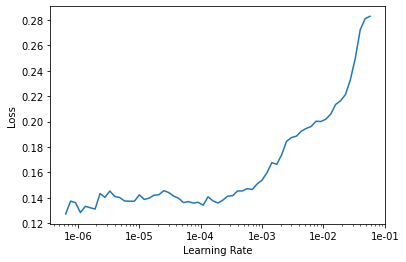

In [ ]:
learner_50.recorder.plot()

In [ ]:
 learn.fit_one_cycle(2, slice(1e-06, 1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.129970,0.158340,0.052092,04:27
1,0.123129,0.163692,0.051238,04:27


By the end my model has a 5% error rate. 